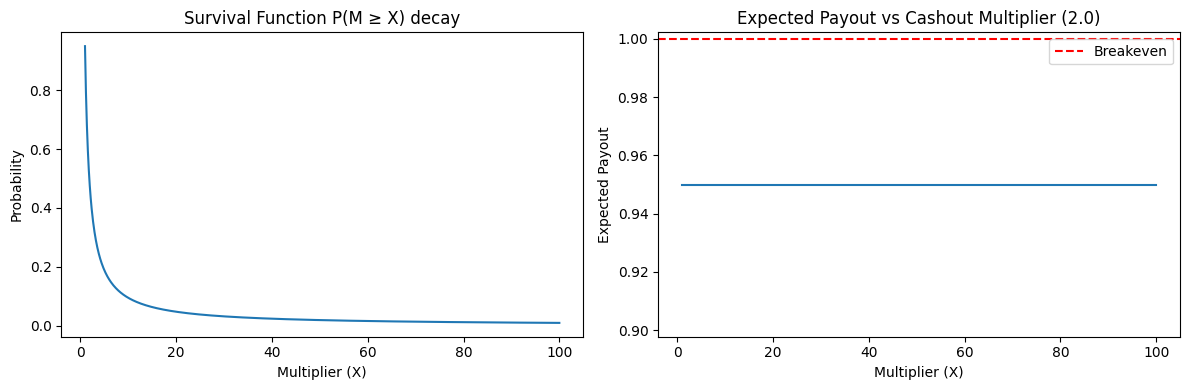

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

class TheoreticalAviator:
    def __init__(self, house_edge=0.05, max_multiplier=1000):
        self.h = house_edge
        self.max_multiplier = max_multiplier
    
    def survival_function(self, X):
        """P(M >= X)"""
        X = np.clip(X, 1e-8, self.max_multiplier)
        return (1 - self.h) / X
    
    def pdf(self, X):
        """Probability density at X"""
        X = np.clip(X, 1e-8, self.max_multiplier)
        return (1 - self.h) / (X ** 2)
    
    def expected_payout(self, X):
        """E[Payout|Bet on X]"""
        return X * self.survival_function(X)

    def sample_multiplier(self, size=1):
        """Sample crash multipliers using inverse transform sampling"""
        u =np.random.uniform(size=size)
        samples = (1 - self.h) / u
        return np.minimum(samples, self.max_multiplier)

    def simulate_strategy(self, cashout_multiplier=2.0, n_rounds=10000):
        """Simulate a fix auto cashout strategy"""
        multipliers = self.sample_multiplier(size=n_rounds)
        cashouts = np.where(multipliers >= cashout_multiplier, cashout_multiplier, 0)
        rtp = cashout_multiplier * 0.1 * n_rounds
        return multipliers, cashouts

# Visualization
model = TheoreticalAviator(house_edge=0.05, max_multiplier=1000)
X = np.linspace(1, 100, 1000)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(X, model.survival_function(X))
plt.title("Survival Function P(M ≥ X) decay")
plt.xlabel("Multiplier (X)")
plt.ylabel("Probability")

plt.subplot(1,2,2)
plt.plot(X, model.expected_payout(X))
plt.axhline(1, color='r', linestyle='--', label='Breakeven')
plt.title("Expected Payout vs Cashout Multiplier (2.0)")
plt.xlabel("Multiplier (X)")
plt.ylabel("Expected Payout")
plt.legend()
plt.tight_layout()
plt.show()